# Sentiment Analysis with [TextBlob](https://textblob.readthedocs.io/en/dev/)
This notebook organize the previously found topics in a polarity x subjectivity matrix.

In [53]:
from textblob import TextBlob
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

In [3]:
df = pd.read_json('../3-topic_modeling/topic_modeling.json')
df.head()

,Topic,Count,Name,CustomName,Representation,Representative_Docs
0,-1,1325,-1_the_printer_to_it,outliers,"[the, printer, to, it, and, this, hp, for, is,...",[If you don't print much this printer is not f...
1,0,124,0_hp_with_support_and,support,"[hp, with, support, and, with hp, hp and, to, ...",[I spent literal hours on the laptop with hp s...
2,1,122,1_set_set up_easy_up,set up,"[set, set up, easy, up, to set, easy to, setup...","[This printer is easy to set up., This was eas..."
3,2,101,2_ink_hp_the_you,ink and cartridge,"[ink, hp, the, you, to, cartridges, for, and, ...",[I paid for instant ink for months and everyth...
4,3,96,3_wifi_to_my_the,wifi and connection,"[wifi, to, my, the, it, my wifi, wireless, con...",[But since this one is STILL NOT in wifi conne...


In [12]:
def avg_sentiment(docs: list[str]) -> tuple[float, float]:
    polarity, subjectivity = .0, .z0
    for doc in docs:
        text_blob = TextBlob(doc)
        polarity += text_blob.sentiment[0]
        subjectivity += text_blob.sentiment[1]
    return polarity/len(docs), subjectivity/len(docs)

In [14]:
polarities, subjectivities = [], []
for topic in df.iterrows():
    polarity, subjectivity = avg_sentiment(topic[1]['Representative_Docs'])
    polarities.append(polarity)
    subjectivities.append(subjectivity)
df['polarity'] = polarities
df['subjectivity'] = subjectivities

In [49]:
df.head()

,Topic,Count,Name,CustomName,Representation,Representative_Docs,polarity,subjectivity
0,-1,1325,-1_the_printer_to_it,outliers,"[the, printer, to, it, and, this, hp, for, is,...",[If you don't print much this printer is not f...,0.182744,0.449579
1,0,124,0_hp_with_support_and,support,"[hp, with, support, and, with hp, hp and, to, ...",[I spent literal hours on the laptop with hp s...,-0.040909,0.228283
2,1,122,1_set_set up_easy_up,set up,"[set, set up, easy, up, to set, easy to, setup...","[This printer is easy to set up., This was eas...",0.441667,0.829630
3,2,101,2_ink_hp_the_you,ink and cartridge,"[ink, hp, the, you, to, cartridges, for, and, ...",[I paid for instant ink for months and everyth...,0.046928,0.443154
4,3,96,3_wifi_to_my_the,wifi and connection,"[wifi, to, my, the, it, my wifi, wireless, con...",[But since this one is STILL NOT in wifi conne...,0.027207,0.244547


In [42]:
df['CustomName'][0]

'outliers'

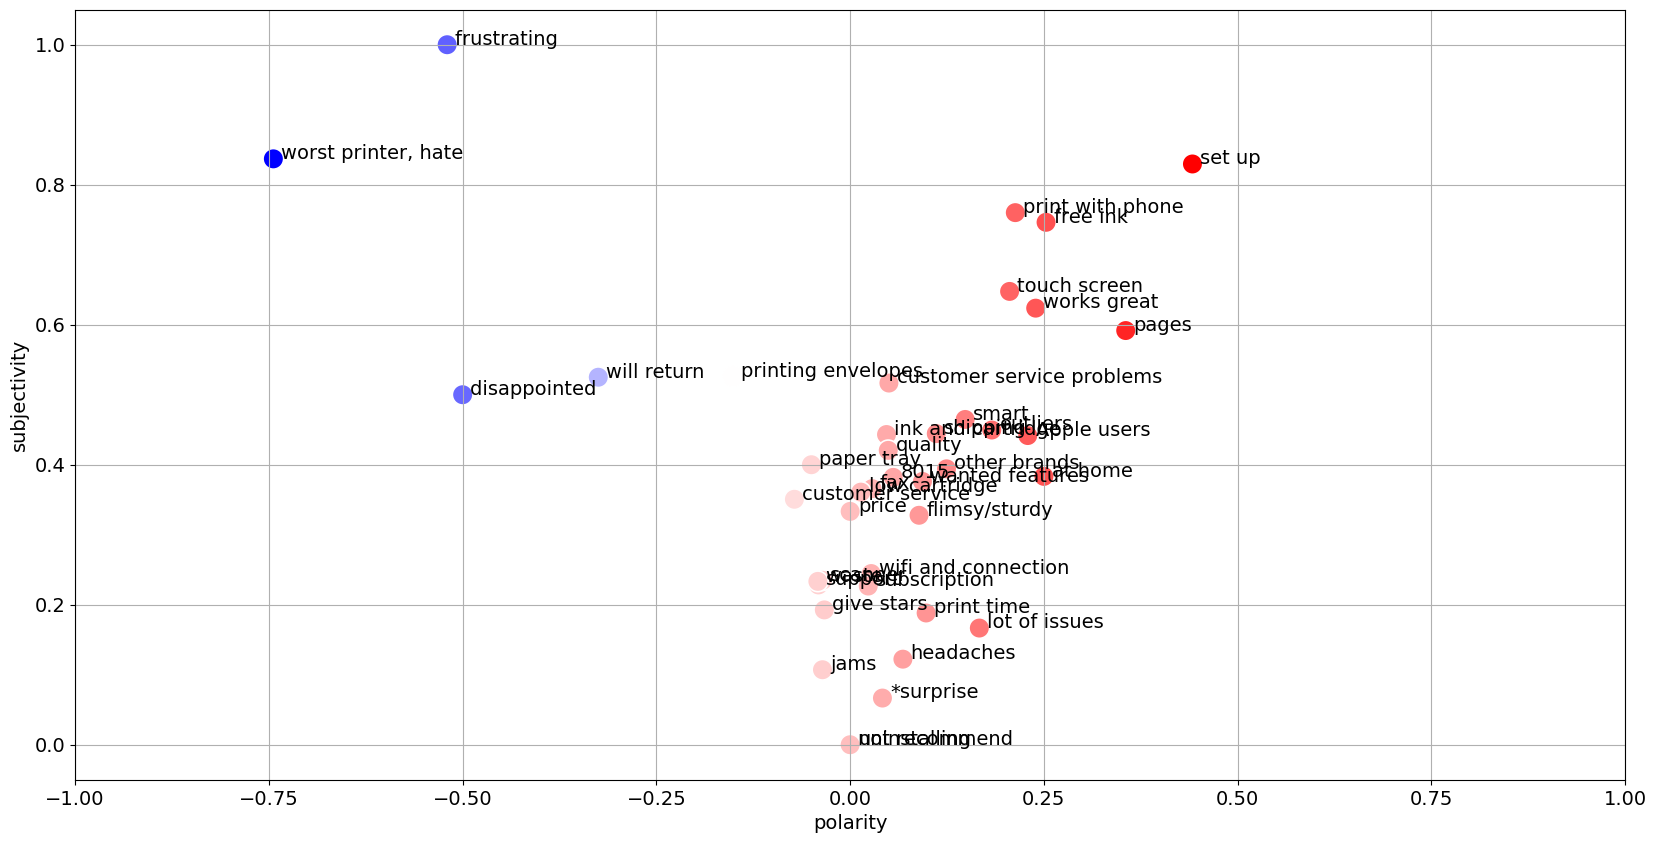

In [101]:
plt.rcParams.update({'font.size': 14})
ax = seaborn.scatterplot(df, x='polarity', y='subjectivity',
                         palette='bwr', hue='polarity', legend=False,s=220)
plt.gcf().set_size_inches((20,10))
for i, point in df.iterrows():
    ax.text(point['polarity']+.01, point['subjectivity'], df['CustomName'][i])
    ax.set_xbound(-1,1)
plt.grid()